In [3]:
import geohash
import pandas as pd
from sklearn import linear_model
import sklearn.metrics as sm
from sklearn import tree
from sklearn import svm
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('training.csv')
data.head()

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


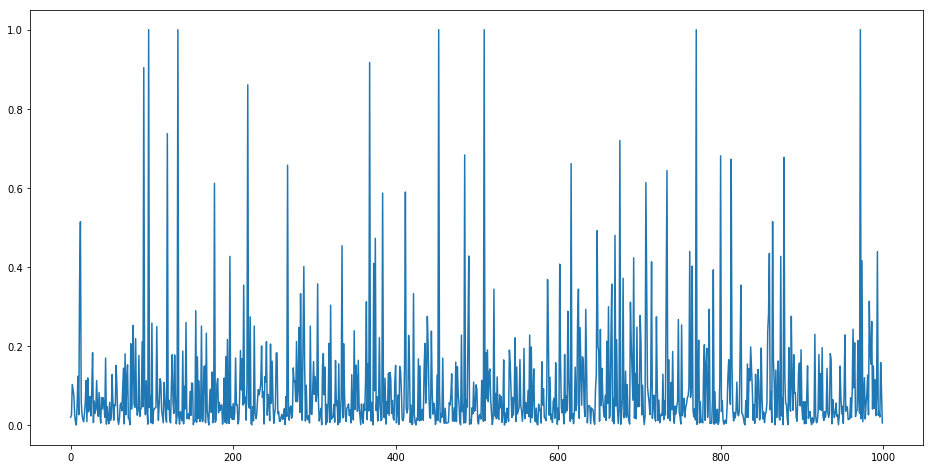

In [5]:
plt.figure(figsize=(16,8))
plt.plot(data['demand'][:1000], label='Close Price history')

In [6]:
data.dtypes

geohash6      object
day            int64
timestamp     object
demand       float64
dtype: object

In [7]:
df = data.iloc[:,:]
df[['timestamp', 'minutes']] = df['timestamp'].str.split(':', expand=True)
df.head()

,geohash6,day,timestamp,demand,minutes
0,qp03wc,18,20,0.020072,0
1,qp03pn,10,14,0.024721,30
2,qp09sw,9,6,0.102821,15
3,qp0991,32,5,0.088755,0
4,qp090q,15,4,0.074468,0


In [8]:
df = df.rename(columns={'timestamp': 'hours'}) #cari cara agar jam dan menit jadi kolom bersebelahan
df.head()

,geohash6,day,hours,demand,minutes
0,qp03wc,18,20,0.020072,0
1,qp03pn,10,14,0.024721,30
2,qp09sw,9,6,0.102821,15
3,qp0991,32,5,0.088755,0
4,qp090q,15,4,0.074468,0


In [9]:
df['geohash6'] = df['geohash6'].apply(lambda x: geohash.decode(x))
df.head()

,geohash6,day,hours,demand,minutes
0,"(-5.35308837890625, 90.6536865234375)",18,20,0.020072,0
1,"(-5.41351318359375, 90.6646728515625)",10,14,0.024721,30
2,"(-5.32562255859375, 90.9063720703125)",9,6,0.102821,15
3,"(-5.35308837890625, 90.7525634765625)",32,5,0.088755,0
4,"(-5.41351318359375, 90.7196044921875)",15,4,0.074468,0


In [10]:
df['geohash6'].tolist()
df[['latitude', 'longitude']] = pd.DataFrame(df['geohash6'].tolist(), index=df.index)
df.head()

,geohash6,day,hours,demand,minutes,latitude,longitude
0,"(-5.35308837890625, 90.6536865234375)",18,20,0.020072,0,-5.353088,90.653687
1,"(-5.41351318359375, 90.6646728515625)",10,14,0.024721,30,-5.413513,90.664673
2,"(-5.32562255859375, 90.9063720703125)",9,6,0.102821,15,-5.325623,90.906372
3,"(-5.35308837890625, 90.7525634765625)",32,5,0.088755,0,-5.353088,90.752563
4,"(-5.41351318359375, 90.7196044921875)",15,4,0.074468,0,-5.413513,90.719604


In [11]:
df = df.drop("geohash6", axis=1)
df.head()

,day,hours,demand,minutes,latitude,longitude
0,18,20,0.020072,0,-5.353088,90.653687
1,10,14,0.024721,30,-5.413513,90.664673
2,9,6,0.102821,15,-5.325623,90.906372
3,32,5,0.088755,0,-5.353088,90.752563
4,15,4,0.074468,0,-5.413513,90.719604


In [12]:
demand = df['demand']
df = df.drop("demand", axis=1)
#df[['demand']] = pd.DataFrame(demand, index=df.index)

df.dtypes

day            int64
hours         object
minutes       object
latitude     float64
longitude    float64
dtype: object

In [14]:
df = df.astype({'hours': int, 'minutes': int})

In [15]:
df.dtypes

day            int64
hours          int32
minutes        int32
latitude     float64
longitude    float64
dtype: object

In [16]:
# preprocessing di atas
# data mining di bawah
X = df.values
X

array([[18.        , 20.        ,  0.        , -5.35308838, 90.65368652],
       [10.        , 14.        , 30.        , -5.41351318, 90.66467285],
       [ 9.        ,  6.        , 15.        , -5.32562256, 90.90637207],
       ...,
       [32.        , 12.        , 15.        , -5.39154053, 90.58776855],
       [42.        ,  5.        , 15.        , -5.46295166, 90.69763184],
       [15.        ,  4.        ,  0.        , -5.28717041, 90.65368652]])

In [17]:
y = demand.values
y

array([0.02007179, 0.02472097, 0.10282096, ..., 0.12326031, 0.12009976,
       0.04265642])

In [18]:
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]
y_test

array([0.04139951, 0.06871307, 0.0097046 , ..., 0.12326031, 0.12009976,
       0.04265642])

In [19]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)
y_test_pred = linear_regressor.predict(X_test)
y_test_pred

array([0.07790287, 0.11083559, 0.08615149, ..., 0.11263452, 0.12633163,
       0.11841076])

In [20]:
# Measure performance 
print("Linear Regressor performance:") 
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2)) 

Linear Regressor performance:
Mean absolute error = 0.1
Mean squared error = 0.03
Median absolute error = 0.07
Explained variance score = 0.01
R2 score = 0.01


In [21]:
model=linear_model.Ridge()
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
y_test_pred

array([0.07790315, 0.11083614, 0.08615131, ..., 0.11263413, 0.12633115,
       0.11841081])

In [22]:
print("Ridge Regression performance:") 
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2)) 

Ridge Regression performance:
Mean absolute error = 0.1
Mean squared error = 0.03
Median absolute error = 0.07
Explained variance score = 0.01
R2 score = 0.01


In [23]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(X_train,y_train)
y_test_pred = dec.predict(X_test)
y_test_pred

array([0.06940923, 0.06940923, 0.11965013, ..., 0.11965013, 0.11965013,
       0.06940923])

In [24]:
print("Decision Tree Regression performance:") 
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2)) 

Decision Tree Regression performance:
Mean absolute error = 0.1
Mean squared error = 0.02
Median absolute error = 0.07
Explained variance score = 0.02
R2 score = 0.02


In [25]:
svm_reg = svm.SVR()
svm_reg.fit(X_train,y_train)
y_test_pred = svm_reg.predict(X_test)
y_test_pred

In [26]:
print("SVR performance:") 
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2)) 